# Exersize 10

Exercise: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. 

In [1]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

In [2]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [3]:
X = faces.data
y = faces.target

In [4]:
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_face(dataset, face_index):
    face = X[face_index]
    face = face.reshape(64, 64)
    plt.imshow(face, cmap="binary")

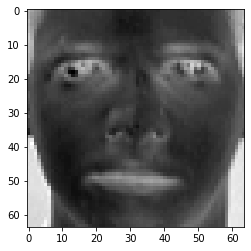

In [6]:
plot_face(X, 0)

In [7]:
from sklearn.model_selection import train_test_split

X_not_test, X_test, y_not_test, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_not_test, y_not_test, 
                                                  test_size=0.2)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 40)
kmeans.fit(X_train, y_train)

KMeans(n_clusters=40)

In [9]:
def plot_inertia(X, y, n_clusters_list=[]):
    X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2)
    inertias = []
    for n_clusters in n_clusters_list:
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X_train, y_train)
        inertia = kmeans.inertia_
        inertias.append(inertia)
    plt.plot(n_clusters_list, inertias)
    plt.xlabel("N clusters", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)

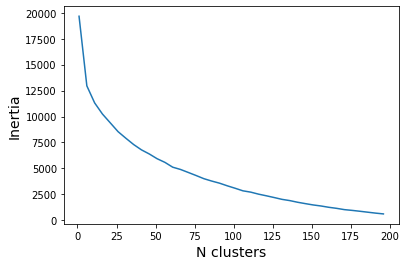

In [10]:
n_clusters = [x for x in range(1, 200 ,5)]
plot_inertia(X_not_test, y_not_test, n_clusters)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_PCA = pca.fit_transform(X_train)

In [12]:
X_train.shape

(256, 4096)

In [13]:
X_train_PCA.shape

(256, 184)

In [14]:
kmeans_models_list = []
for k in range(5, 150, 5):
    kmeans_models_list.append(KMeans(n_clusters=k, random_state=42).fit(X_train_PCA))

In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_PCA, model.labels_)
                     for model in kmeans_models_list]

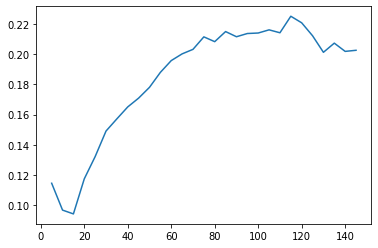

In [16]:
import numpy as np

plt.plot(range(5, 150, 5), silhouette_scores)
best_index = np.argmax(silhouette_scores)

In [17]:
best_index

22

In [18]:
kmeans_model = kmeans_models_list[best_index]

In [19]:
kmeans_model.n_clusters

115

Cluster 0


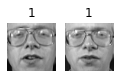

Cluster 1


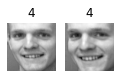

Cluster 2


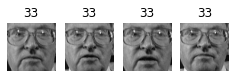

Cluster 3


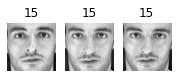

Cluster 4


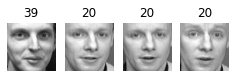

Cluster 5


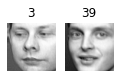

Cluster 6


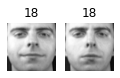

Cluster 7


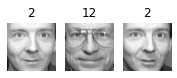

Cluster 8


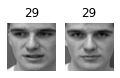

Cluster 9


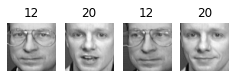

Cluster 10


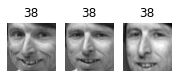

Cluster 11


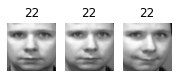

Cluster 12


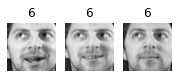

Cluster 13


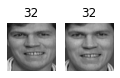

Cluster 14


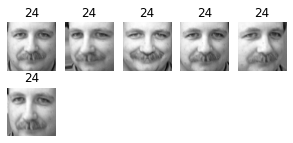

Cluster 15


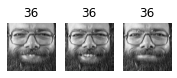

Cluster 16


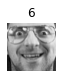

Cluster 17


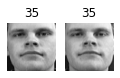

Cluster 18


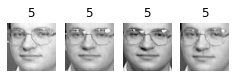

Cluster 19


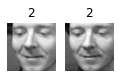

Cluster 20


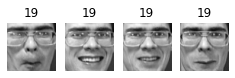

Cluster 21


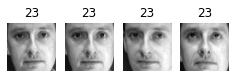

Cluster 22


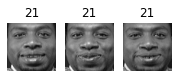

Cluster 23


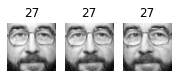

Cluster 24


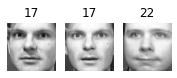

Cluster 25


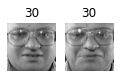

Cluster 26


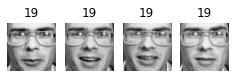

Cluster 27


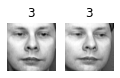

Cluster 28


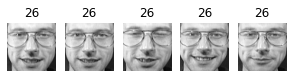

Cluster 29


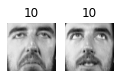

Cluster 30


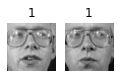

Cluster 31


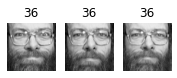

Cluster 32


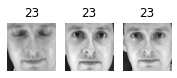

Cluster 33


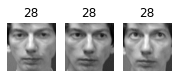

Cluster 34


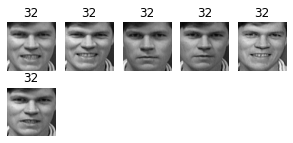

Cluster 35


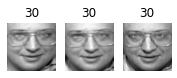

Cluster 36


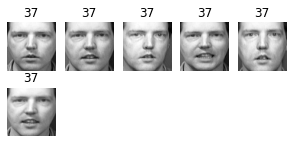

Cluster 37


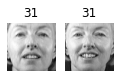

Cluster 38


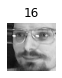

Cluster 39


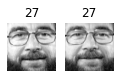

Cluster 40


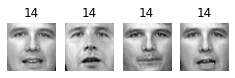

Cluster 41


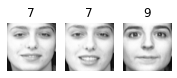

Cluster 42


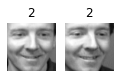

Cluster 43


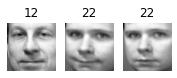

Cluster 44


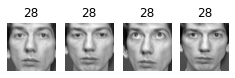

Cluster 45


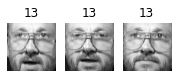

Cluster 46


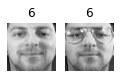

Cluster 47


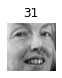

Cluster 48


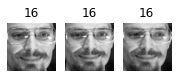

Cluster 49


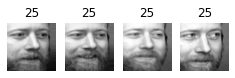

Cluster 50


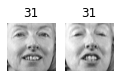

Cluster 51


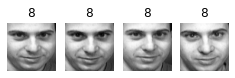

Cluster 52


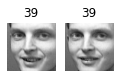

Cluster 53


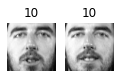

Cluster 54


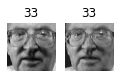

Cluster 55


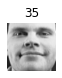

Cluster 56


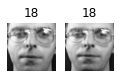

Cluster 57


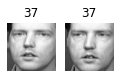

Cluster 58


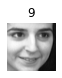

Cluster 59


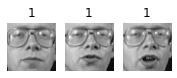

Cluster 60


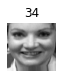

Cluster 61


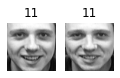

Cluster 62


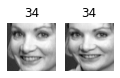

Cluster 63


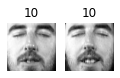

Cluster 64


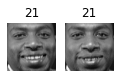

Cluster 65


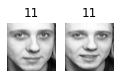

Cluster 66


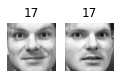

Cluster 67


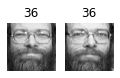

Cluster 68


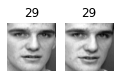

Cluster 69


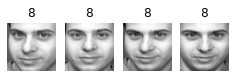

Cluster 70


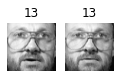

Cluster 71


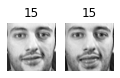

Cluster 72


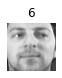

Cluster 73


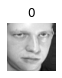

Cluster 74


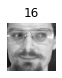

Cluster 75


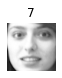

Cluster 76


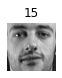

Cluster 77


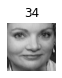

Cluster 78


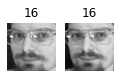

Cluster 79


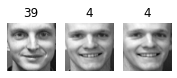

Cluster 80


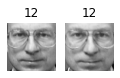

Cluster 81


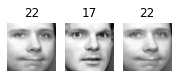

Cluster 82


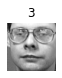

Cluster 83


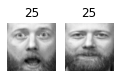

Cluster 84


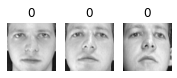

Cluster 85


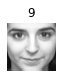

Cluster 86


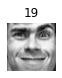

Cluster 87


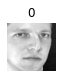

Cluster 88


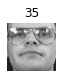

Cluster 89


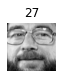

Cluster 90


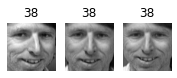

Cluster 91


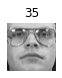

Cluster 92


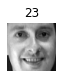

Cluster 93


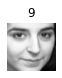

Cluster 94


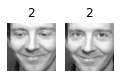

Cluster 95


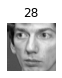

Cluster 96


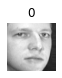

Cluster 97


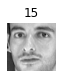

Cluster 98


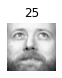

Cluster 99


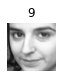

Cluster 100


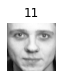

Cluster 101


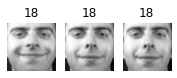

Cluster 102


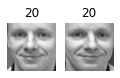

Cluster 103


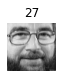

Cluster 104


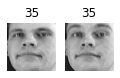

Cluster 105


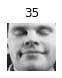

Cluster 106


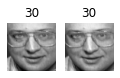

Cluster 107


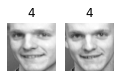

Cluster 108


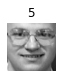

Cluster 109


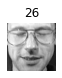

Cluster 110


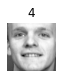

Cluster 111


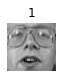

Cluster 112


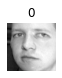

Cluster 113


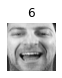

Cluster 114


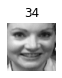

In [20]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(kmeans_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [21]:
np.arange(2, 100, 2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

# Exersize 11

Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.*

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_grid = {"n_estimators": np.arange(1, 200, 10)}

forest_clf = RandomForestClassifier(random_state=42)


# Trying on original X data

In [23]:
grid_search = GridSearchCV(forest_clf, params_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])})

In [24]:
forest_clf = grid_search.best_estimator_
forest_clf.n_estimators

191

In [25]:
from sklearn.metrics import accuracy_score

y_hat = forest_clf.predict(X_val)
accuracy_score(y_val, y_hat)

0.890625

# Trying on X_PCA_data

In [26]:
grid_search = GridSearchCV(forest_clf, params_grid, cv=3)
grid_search.fit(X_train_PCA, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=191,
                                              random_state=42),
             param_grid={'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])})

In [27]:
forest_clf = grid_search.best_estimator_
forest_clf.n_estimators

161

In [28]:
X_val_PCA = pca.transform(X_val)

In [29]:
y_hat = forest_clf.predict(X_val_PCA)
accuracy_score(y_val, y_hat)

0.875

In [30]:
forest_clf.score(X_val_PCA, y_val)

0.875

### Using KMeans as dimensionality Reduction tool

In [31]:
X_train_reduced = kmeans_model.transform(X_train_PCA)
X_val_reduced = kmeans_model.transform(X_val_PCA)
X_test_PCA = pca.transform(X_test)
X_test_reduced = kmeans_model.transform(X_test_PCA)

In [32]:
clf = RandomForestClassifier(n_estimators=180, random_state=42)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(n_estimators=180, random_state=42)

In [33]:
clf.score(X_val_reduced, y_val)

0.6875

In [34]:
from sklearn.pipeline import Pipeline

for n_clusters in range(5, 150, 5):
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=180, random_state=42))
    ])
    pipeline.fit(X_train_PCA, y_train)
    print(n_clusters, pipeline.score(X_val_PCA, y_val))

5 0.296875
10 0.453125
15 0.53125
20 0.546875
25 0.640625
30 0.625
35 0.671875
40 0.671875
45 0.65625
50 0.703125
55 0.71875
60 0.640625
65 0.6875
70 0.640625
75 0.671875
80 0.65625
85 0.703125
90 0.6875
95 0.671875
100 0.671875
105 0.6875
110 0.671875
115 0.6875
120 0.671875
125 0.71875
130 0.703125
135 0.71875
140 0.703125
145 0.671875


In [35]:
X_train_extended = np.c_[X_train_PCA, X_train_reduced]
X_val_extended = np.c_[X_val_PCA, X_val_reduced]
X_test_extended = np.c_[X_test_PCA, X_test_reduced]

In [36]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_val_extended, y_val)

0.78125

# Exersize 12 

Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance)

In [37]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_hat = gm.fit_predict(X_train_PCA)

In [38]:
n_gen_faces=20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

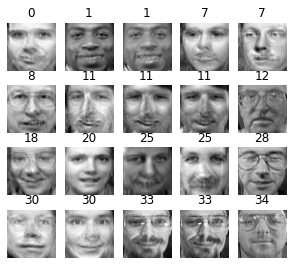

In [39]:
plot_faces(gen_faces, y_gen_faces)

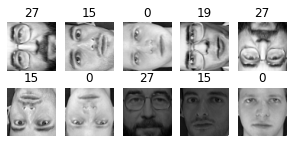

In [40]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

# Exersize 13 Using Dimensionality Reduction Techniques for Anomaly Detection

Exercise: Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [41]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X)
    plt.imshow
    return mse

In [42]:
reconstruction_errors(pca, X_train).mean()

0.0001895801

In [43]:
reconstruction_errors(pca, X_bad_faces).mean()

0.006487906

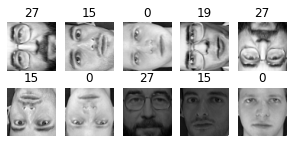

In [44]:
plot_faces(X_bad_faces, y_bad)

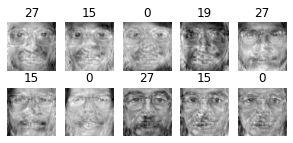

In [45]:
X_bad_faces_pca = pca.transform(X_bad_faces)
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)